# Simple Linear Regression. Minimal Example

### Import the relavant libraries

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D # Nice 3D graphs

### Generate random input dara to train on

In [42]:
observations = 1000
# np.random.uniform(low, high, size) draws a random value from the interval (low,high), where each number has an equal chance to be selected
x = np.random.uniform(-10,10, (observations,1))
z = np.random.uniform(-10,10, (observations,1))

inputs = np.column_stack((x,z)) # np.column_stack() takes a sequence of 1D arrays and stacks them into a single 2D array

inputs.shape

(1000, 2)

### Create the targets we will aim at

In [43]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*x - 3*z + 5 + noise

targets.shape

(1000, 1)

### Plot the training data

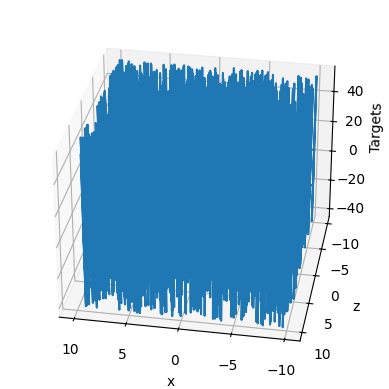

In [44]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, z, targets)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,)

### Initialize variables

In [45]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range,(2,1))
biases = np.random.uniform(-init_range, init_range,1)

print(weights)
print(biases)

[[-0.01324845]
 [ 0.08896682]]
[-0.03409162]


### Set the learning rate

In [46]:
learning_rate = 0.02

### Train the model

In [47]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2  / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations # Another way to make the algorithm more universal
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled) # Updating the weights follow the gradient decent logic
    
    biases = biases - learning_rate * np.sum(deltas_scaled)

235354.42308283361
6476165.575730742


2259811267.2718725
815805358404.1987
294538804114455.06
1.0634047599996462e+17
3.839323269544864e+19
1.3861517008917236e+22
5.00457086572136e+24
1.8068534298168736e+27
6.523475047985804e+29
2.3552395562049776e+32
8.503371786215956e+34
3.0700627264906776e+37
1.1084173880137581e+40
4.001837146355691e+42
1.4448258137352018e+45
5.216408253735686e+47
1.883335334333168e+50
6.799605799656693e+52
2.4549339773893894e+55
8.863309154841263e+57
3.2000147416523537e+60
1.1553353457381208e+63
4.1712300375922235e+65
1.50598353029662e+68
5.437212460317425e+70
1.9630546246948814e+73
7.087424829654317e+75
2.5588483419715396e+78
9.238482233793014e+80
3.3354674673040285e+83
1.2042392834559644e+86
4.347793123554841e+88
1.5697299784957567e+91
5.667363039972859e+93
2.046148335500959e+96
7.387426888561199e+98
2.667161275014581e+101
9.629535932128732e+103
3.476653741819622e+106
1.2552132652810372e+109
4.531829909851356e+111
1.6361747361891639e+114
5.907255613288205e+116
2.132759301857999e+119
7.700127669149325e

In [48]:
print(weights, biases)

[[-4.52019196e+124 -4.52019196e+124 -4.52019196e+124 ... -4.52019196e+124
  -4.52019196e+124 -4.52019196e+124]
 [ 9.42185009e+124  9.42185009e+124  9.42185009e+124 ...  9.42185009e+124
   9.42185009e+124  9.42185009e+124]] [-4.4438003e+128]


### Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.
The closer this plot is to a 45 degree line, the closer target and output values are.

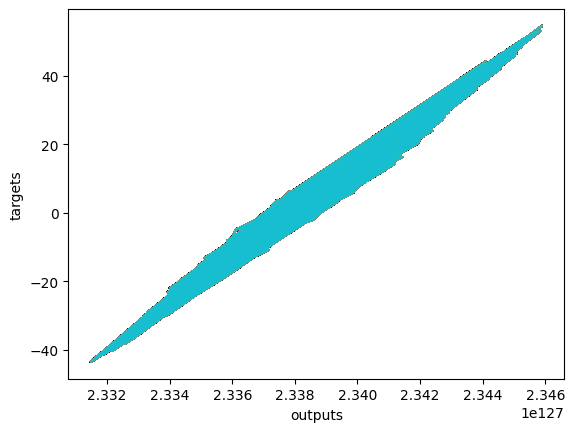

In [49]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()